# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("telecon.csv", delimiter=';')

df.head()

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




## Pré análise

In [3]:
# Eliminacao de dados sensiveis
df.drop('customerID', axis=1, inplace=True)

# Padronizacao PT-BR
df.rename(columns={'PhoneService': 'Servico_Celular'}, inplace=True)
df.rename(columns={'StreamingTV': 'Servico_TV'}, inplace=True)
df.rename(columns={'PaymentMethod': 'Metodo_Pagamento'}, inplace=True)
df.rename(columns={'Dependents': 'Dependentes'}, inplace=True)

df.head()


,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Celular,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Servico_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes


## 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [4]:
# Verificação de tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genero              2488 non-null   object 
 1   Idoso               2500 non-null   int64  
 2   Casado              2500 non-null   object 
 3   Dependentes         2500 non-null   object 
 4   Tempo_como_Cliente  2500 non-null   int64  
 5   Servico_Celular     1018 non-null   object 
 6   Servico_Internet    2500 non-null   object 
 7   Servico_Seguranca   2500 non-null   object 
 8   Suporte_Tecnico     2500 non-null   object 
 9   Servico_TV          2500 non-null   object 
 10  Tipo_Contrato       2500 non-null   object 
 11  Metodo_Pagamento    2500 non-null   object 
 12  Pagamento_Mensal    2175 non-null   float64
 13  Total_Pago          2500 non-null   float64
 14  Churn               2495 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 293.1

**Tratamento de tipos**
1. Trocar `Idoso` de `int64` para booleano.
2. Trocar colunas de Yes/No para booleano.

In [5]:
# Transformacao de booleano
df['Idoso'] = df['Idoso'].astype(bool)

# Preparacao e troca para booleano
df['Dependentes'] = df['Dependentes'].map({'Yes': True, 'No': False})
df['Dependentes'] = df['Dependentes'].astype(bool)

df['Servico_Celular'] = df['Servico_Celular'].map({'Yes': True, 'No': False})
df['Servico_Celular'] = df['Servico_Celular'].astype(bool)

df['Servico_Seguranca'] = df['Servico_Seguranca'].map({'Yes': True, 'No': False})
df['Servico_Seguranca'] = df['Servico_Seguranca'].astype(bool)

df['Suporte_Tecnico'] = df['Suporte_Tecnico'].map({'Yes': True, 'No': False})
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].astype(bool)

df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})
df['Churn'] = df['Churn'].astype(bool)

df['Servico_TV'] = df['Servico_TV'].map({'Yes': True, 'No': False})
df['Servico_TV'] = df['Servico_TV'].astype(bool)

df['Casado'] = df['Casado'].map({'Yes': True, 'No': False})
df['Casado'] = df['Casado'].astype(bool)

# Resultado parcial
df.head()

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Celular,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Servico_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,Female,False,True,False,1,False,DSL,False,False,False,Month-to-month,Electronic check,29.85,29.85,False
1,Male,False,False,False,34,True,DSL,True,False,False,One year,Mailed check,56.95,1889.50,False
2,Male,False,False,False,2,True,DSL,True,False,False,Month-to-month,Mailed check,53.85,108.15,True
3,Male,False,False,False,45,False,DSL,True,True,False,One year,Bank transfer (automatic),NaN,1840.75,False
4,NaN,False,False,False,2,True,Fiber optic,False,False,False,Month-to-month,Electronic check,NaN,151.65,True


## 2 - Esse exercício faremos por etapas:
### A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [6]:
# Verificacao de dados faltantes
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Pagamento_Mensal      13.00
Genero                 0.48
Idoso                  0.00
Dependentes            0.00
Tempo_como_Cliente     0.00
Servico_Celular        0.00
Casado                 0.00
Servico_Internet       0.00
Servico_Seguranca      0.00
Servico_TV             0.00
Suporte_Tecnico        0.00
Tipo_Contrato          0.00
Metodo_Pagamento       0.00
Total_Pago             0.00
Churn                  0.00
dtype: float64

### B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [7]:
df.dropna(subset=['Genero'], inplace=True)

**Justificativa:** Optei por excluir, pois 0.48% é uma quantidade relativamente pequena.

### C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

In [ ]:
df['Pagamento_Mensal'].dropna().describe().round(2)

count    2175.000000
mean       65.607563
std        29.931520
min        18.400000
25%        39.500000
50%        71.450000
75%        90.250000
max       118.650000
Name: Pagamento_Mensal, dtype: float64

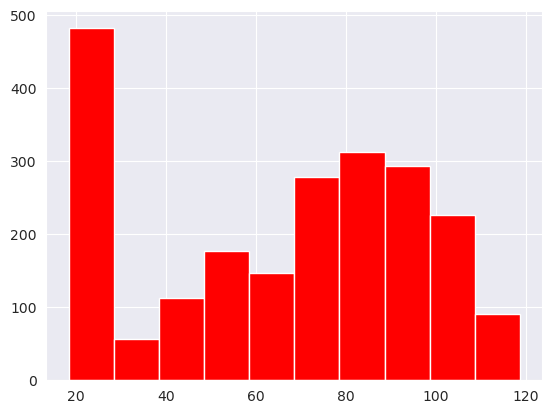

In [9]:
plt.hist(df['Pagamento_Mensal'], color='red')
plt.show()

In [10]:
media_pagamento_mensal = df['Pagamento_Mensal'].mean()
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(media_pagamento_mensal)

**Justificativa:** Já em relação ao Pagamento mensal, optei por substituir pela média, porque mesmo não sendo uma quantidade muito expressiva, é um dado importante para eventuais análises.

A escolha da **média** vem do fato de que: quando a mediana tem o valor maior que a média, quer dizer que existem mais valores menores do que maiores na curva (vide gráfico)

## 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [11]:
# Padronizacao nas colunas de texto
df['Genero'] = df['Genero'].str.upper()
df['Servico_Internet'] = df['Servico_Internet'].str.upper()
df['Tipo_Contrato'] =df['Tipo_Contrato'].str.upper()
df['Metodo_Pagamento'] = df['Metodo_Pagamento'].str.upper()

# Verificação Erros Lexicais
print("Genero: ",df['Genero'].unique())
print("Servico_Internet: ",df['Servico_Internet'].unique())
df['Tipo_Contrato'] = df['Tipo_Contrato'].str.upper()
print("Metodo_Pagamento: ", df['Metodo_Pagamento'].unique())


Genero:  ['FEMALE' 'MALE' 'F' 'M']
Servico_Internet:  ['DSL' 'NO' 'FIBER OPTIC']
Metodo_Pagamento:  ['ELECTRONIC CHECK' 'MAILED CHECK' 'BANK TRANSFER (AUTOMATIC)'
 'CREDIT CARD (AUTOMATIC)']


In [12]:
# Correcao
df['Genero'] = df['Genero'].replace('FEMALE', 'F')
df['Genero'] = df['Genero'].replace('MALE', 'M')

# Confirmacao de corrigidos
print("Genero: ",df['Genero'].unique())

# Resultado parcial
df.head()

Genero:  ['F' 'M']


,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Celular,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Servico_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,F,False,True,False,1,False,DSL,False,False,False,MONTH-TO-MONTH,ELECTRONIC CHECK,29.850000,29.85,False
1,M,False,False,False,34,True,DSL,True,False,False,ONE YEAR,MAILED CHECK,56.950000,1889.50,False
2,M,False,False,False,2,True,DSL,True,False,False,MONTH-TO-MONTH,MAILED CHECK,53.850000,108.15,True
3,M,False,False,False,45,False,DSL,True,True,False,ONE YEAR,BANK TRANSFER (AUTOMATIC),65.607563,1840.75,False
16,F,False,False,False,52,True,NO,True,True,True,ONE YEAR,MAILED CHECK,65.607563,1022.95,False


## [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português ou inglês

Feito inicialmente.

## Conclusão

In [15]:
df.reset_index(drop=True, inplace=True)

# Resultado final
df.head()
df.to_csv('tarefam14.csv', sep=';', index=False)